Информация о задании: MSE - mean squared error, MAE - mean absolute error.

Импортируем необходимые библиотеки.

In [32]:
from sklearn import cross_validation, datasets, metrics, neighbors
import numpy as np
from scipy.stats import norm 
import scipy as sps

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Сгенерируем выборку из 500 элементов по правилам из задания.

In [94]:
X = np.arange(1, 501)
eps = norm.rvs(scale = 0.2, size=500)
Y = np.array([])
for i in range (500):
    Y = np.append(Y, 0.5 * X[i] + 1 + eps[i])

Визуализируем полученную выборку.

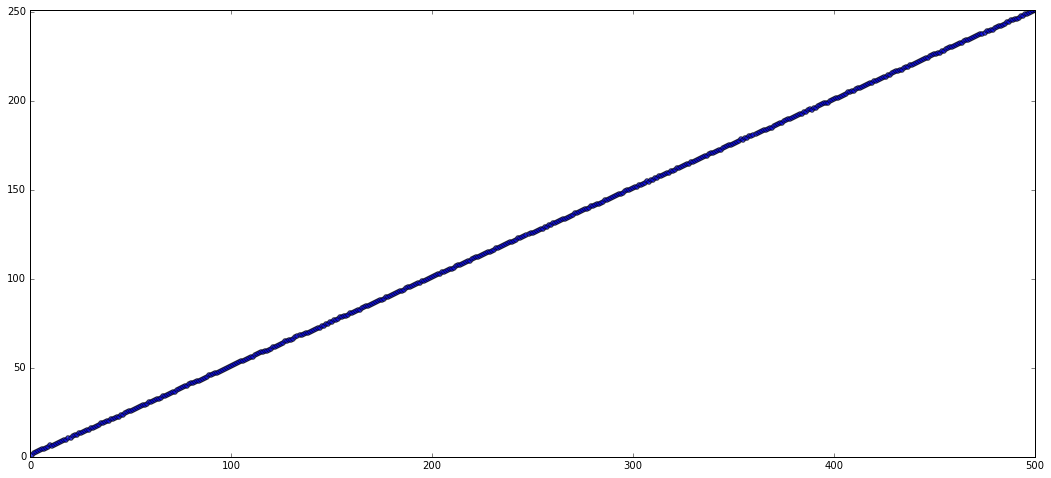

In [95]:
fig = plt.figure(figsize=(18,8))

plt.scatter(X, Y, alpha = 0.7)

axis = fig.gca()
axis.set_xlim(0, np.max(X))
axis.set_ylim(0, np.max(Y))

plt.show()

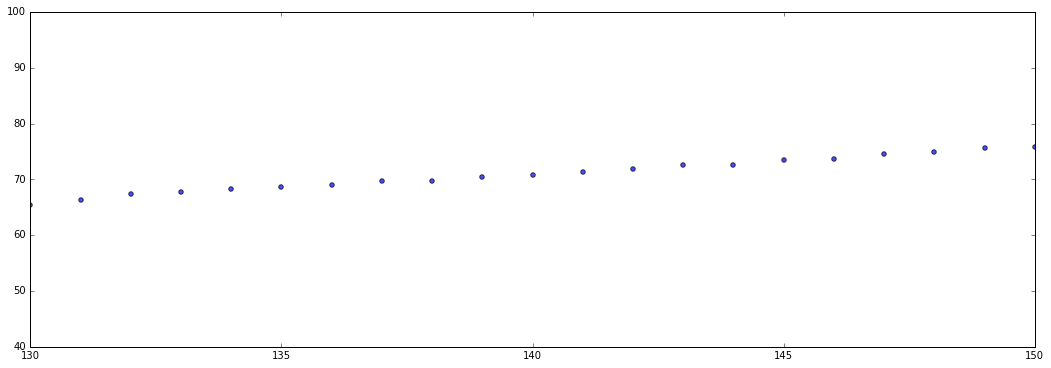

In [96]:
fig = plt.figure(figsize=(18,6))

plt.scatter(X, Y, alpha = 0.7)

#наглядное приближение точек, чтобы иметь представление о выборке
axis = fig.gca()
axis.set_xlim(130, 150)
axis.set_ylim(40, 100)

plt.show()

Восстановим прямую с помощью минимизации MSE.

In [97]:
def find_line(metric, x, y):
    ret = sps.optimize.minimize(lambda theta: metric(theta[0] * x + theta[1], y), (1, 1))
    return ret.x[0], ret.x[1]

a, b = find_line(metrics.mean_squared_error, X, Y)

_Y = np.array([])
for i in range (500):
    _Y = np.append(_Y, a * X[i] + b)

Визуализируем полученную прямую.

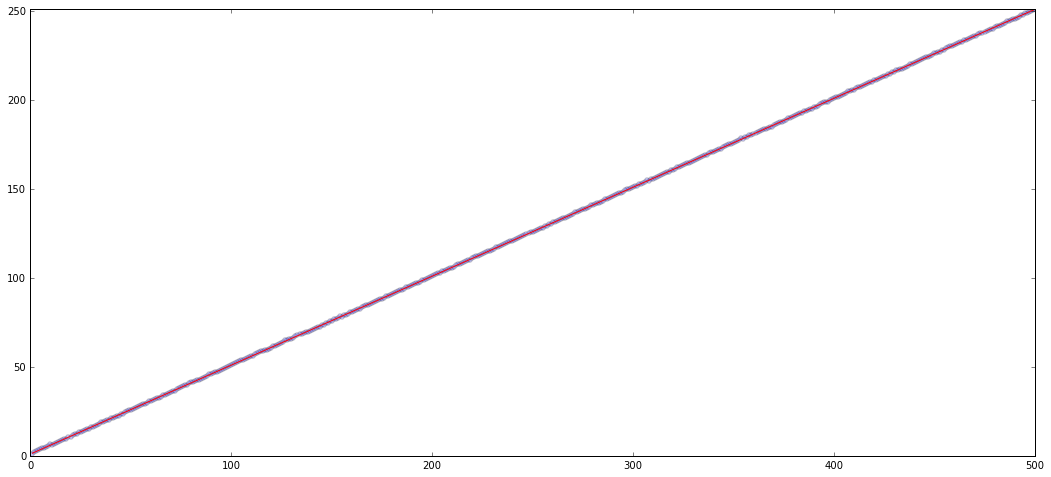

In [99]:
fig = plt.figure(figsize=(18,8))

plt.plot(X, _Y, color = 'red')
plt.scatter(X, Y, alpha = 0.2)

axis = fig.gca()
axis.set_xlim(0, np.max(X))
axis.set_ylim(0, np.max(_Y))

plt.show()

Добавим в выборку новые 75 точек по определенным правилам. 

In [100]:
X_app = np.linspace(1, 501, num = 75)
eps_app = norm.rvs(scale = 0.2, size=75)
Y_app = np.array([])
for i in range (75):
    Y_app = np.append(Y_app, -1 + eps_app[i])
    
X = np.append(X, X_app)
Y = np.append(Y, Y_app)

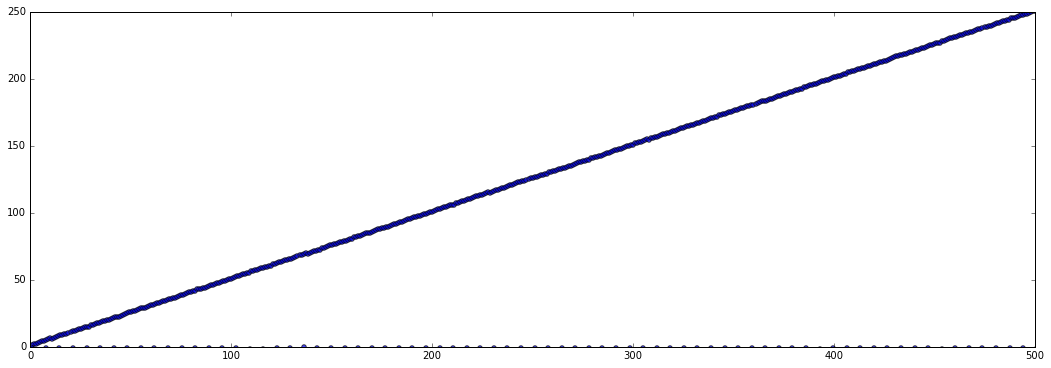

In [101]:
fig = plt.figure(figsize=(18,6))

plt.scatter(X, Y, alpha = 0.7)

axis = fig.gca()
axis.set_xlim(0, 500)
axis.set_ylim(0, 250)

plt.show()

Восстановим зависимость по новой выборке двумя способами: минимизируя MSE и минимизируя MAE.

In [102]:
a1, b1 = find_line(metrics.mean_squared_error, X, Y)

Y1 = np.array([])
for i in range (575):
    Y1 = np.append(Y1, a1 * X[i] + b1)
    
a2, b2 = find_line(metrics.mean_absolute_error, X, Y)

Y2 = np.array([])
for i in range (575):
    Y2 = np.append(Y2, a2 * X[i] + b2)

In [103]:
print X.size, Y1.size, Y2.size

575 575 575


Визуализируем полученные прямые.

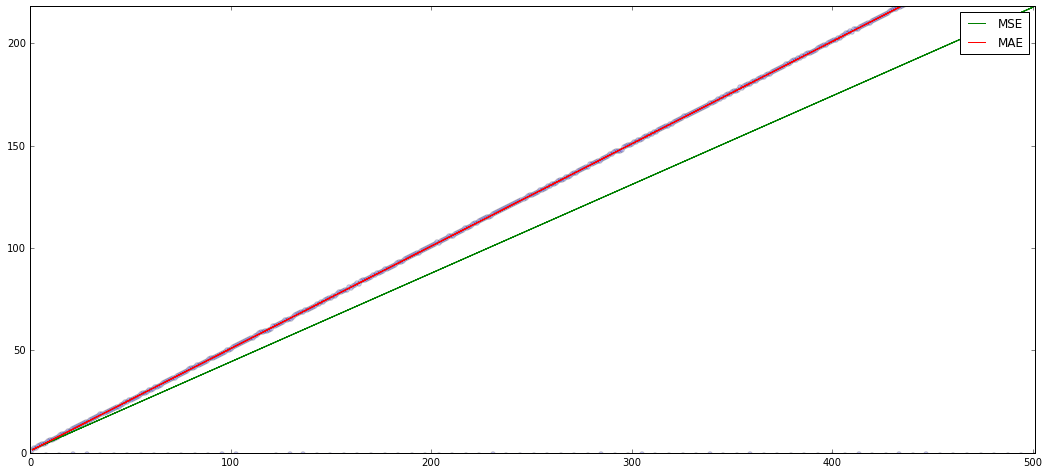

In [104]:
fig = plt.figure(figsize=(18,8))

plt.plot(X, Y1, color = 'green')
plt.plot(X, Y2, color = 'red')
plt.scatter(X, Y, alpha = 0.2)

axis = fig.gca()
axis.set_xlim(0, np.max(X))
axis.set_ylim(0, np.max(Y1))

plt.legend(['MSE', 'MAE'])

plt.show()

Вывод: судя по графикам, модель, оптимизирующая MAE более устойчива к выбросам, чем MSE.